In [1]:
import torch
import pytorch_lightning as pl
import norse_dvs

In [2]:
!ls

cscs		       fcn8s-torch.py	norse_dvs.py   Spconv.ipynb
fcn8s_norse.py	       lightning_logs	preprocessing  Untitled.ipynb
fcn8s_norse_simple.py  Minkowski.ipynb	__pycache__    voc11seg
fcn8s.py	       model.ckpt	README.md
fcn8s_query.sif        norse-dvs.py	scenes_60.dat


In [3]:
m = torch.load('model.ckpt')

In [4]:
weights = m['state_dict']['loss_fn.weight']

In [5]:
model = norse_dvs.DVSModel.load_from_checkpoint('model.ckpt', n_class=9, n_channels=2, height=128, width=128, iter_per_frame=2, class_weights=weights)

In [6]:
dataset = norse_dvs.DVSNRPDataset(skip_frames=6, scale_factor = 0.25)

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
model.freeze()

In [180]:
x, z = dataset[60]
x = x.view(1, 48, 2, 128, 128)
y = model(x)

/home/jeped/fcn8s-norse/norse_dvs.py:133: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data[self.skip_frames:])
/home/jeped/fcn8s-norse/norse_dvs.py:134: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels[self.skip_frames:])
/home/jeped/.venvs/a2c/lib/python3.8/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for detai

In [181]:
#image = y.squeeze().permute(1, 0, 2, 3).detach()
image = y.squeeze().permute(1, 2, 3, 0).detach()

In [182]:
image.shape

torch.Size([48, 128, 128, 9])

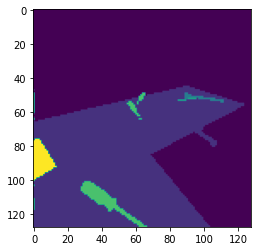

In [183]:
plt.imshow(z[47])

In [146]:
image[47,:,:,3]

tensor([[ -45.0178,  -92.9691, -106.8697,  ..., -158.3837, -151.9480,
         -142.0497],
        [ -82.2875, -133.2173, -131.8175,  ..., -182.5506, -179.1255,
         -167.4404],
        [ -74.8775, -167.6851, -149.8535,  ..., -203.1877, -198.6326,
         -177.5557],
        ...,
        [  -3.8671,   -8.0077,   -7.8806,  ...,  -48.3479,  -45.7620,
          -39.7118],
        [  -3.4063,   -7.6776,   -7.4268,  ...,  -44.3196,  -43.4382,
          -35.9505],
        [  -2.9353,   -6.8861,   -6.6921,  ...,  -39.1524,  -40.0391,
          -32.4985]])

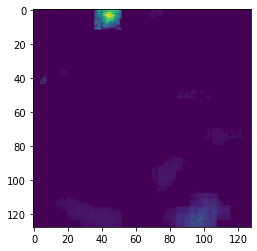

In [184]:
a = image[47,:,:,3].clone()
a[a < 10] = 0
plt.imshow(a)

In [168]:
z[20].max()

tensor(7)

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"

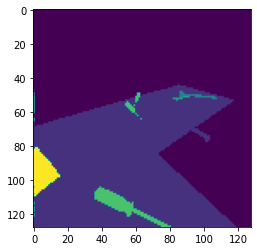

In [200]:
fig = plt.figure()
ims = []
for i in range(20, 44):
    im = plt.imshow(z[i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('screwdriver_clean.mp4')
ani

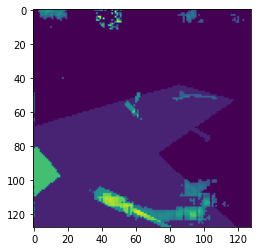

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"

fig = plt.figure()
ims = []
for i in range(20, 44):
    a = image[i,:,:,5]
    a[a < 10] = 0
    a = (a / a.max()) * 10
    im = plt.imshow(z[i] + a, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('screwdriver_mask.mp4')
ani